In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.decomposition import PCA

from Data.prepare_fashion_mnist_dataset import FashionMnistData

In [13]:
data = FashionMnistData(path_to_folder="../raw_data", normalize=True)
X_train, y_train, X_test, y_test = data.get()

### Exploratory Data Analysis

In [14]:
print(f"{len(X_train)} Training Samples")
print(f"Number of features = {X_train.shape[1]}")
print(f"Classes = {list(set(y_train))}", end="\n\n")

def distribution(data_, data_set_type):
    classes, counts = np.unique(data_, return_counts=True)
    classes_count = dict(zip(classes, counts))
    return f"The distribution of classes in the {data_set_type} Data:\n{classes_count}"

print(distribution(y_train, data_set_type="Training"), end="\n\n")
print(distribution(y_test, data_set_type="Test"))

10000 Training Samples
Number of features = 784
Classes = [0, 1, 2, 3, 4]

The distribution of classes in the Training Data:
{0: 2033, 1: 1947, 2: 2001, 3: 2005, 4: 2014}

The distribution of classes in the Test Data:
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000}


Note: Large amount of features (each image is 28x28 pixels resulting in 784 individual pixels)

Plotting samples from each class:

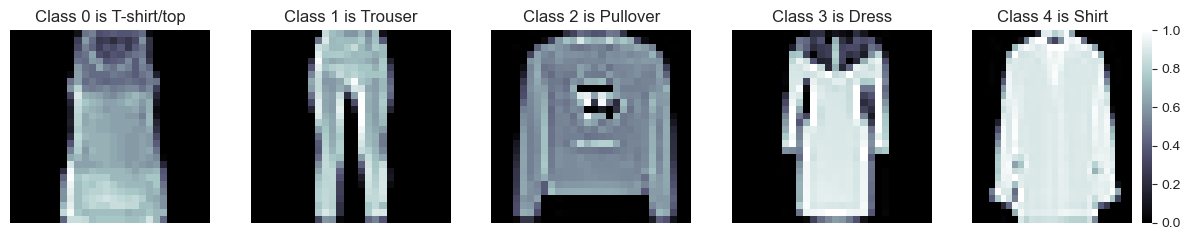

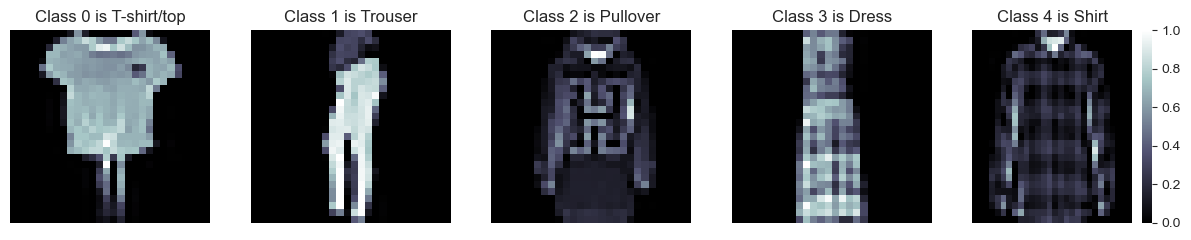

In [15]:
def extract_sample_in_class(X, y, cls):
    mask = np.where(y==cls)
    X = X[mask]
    x = random.choice(X).reshape(28, 28)
    return x

def plot_sample_from_each_class():
    s0 = extract_sample_in_class(X_train, y_train, 0)
    s1 = extract_sample_in_class(X_train, y_train, 1)
    s2 = extract_sample_in_class(X_train, y_train, 2)
    s3 = extract_sample_in_class(X_train, y_train, 3)
    s4 = extract_sample_in_class(X_train, y_train, 4)
    fig, ax = plt.subplots(1,5, figsize=(15,2.5))
    sns.heatmap(s0, ax=ax[0], cmap=plt.cm.bone, cbar=False,  xticklabels=False, yticklabels=False)
    sns.heatmap(s1, ax=ax[1], cmap=plt.cm.bone, cbar=False,  xticklabels=False, yticklabels=False)
    sns.heatmap(s2, ax=ax[2], cmap=plt.cm.bone, cbar=False,  xticklabels=False, yticklabels=False)
    sns.heatmap(s3, ax=ax[3], cmap=plt.cm.bone, cbar=False,  xticklabels=False, yticklabels=False)
    sns.heatmap(s4, ax=ax[4], cmap=plt.cm.bone, cbar=True,  xticklabels=False, yticklabels=False)
    ax[0].set_title("Class 0 is T-shirt/top")
    ax[1].set_title("Class 1 is Trouser")
    ax[2].set_title("Class 2 is Pullover")
    ax[3].set_title("Class 3 is Dress")
    ax[4].set_title("Class 4 is Shirt")


plot_sample_from_each_class()
plot_sample_from_each_class()

Number of components needed to surpass 0.9 = 61


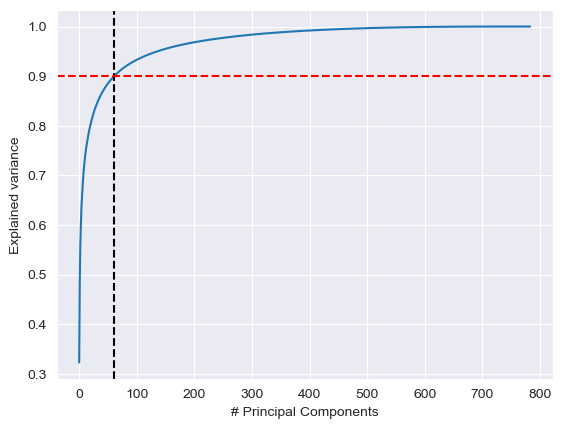

In [23]:
pca = PCA()
X_pca = pca.fit_transform(X_train)
# finding number of principal components to explain 90 % of variance

# showing relationship between adding more PCA's and total explained variance
explained_variance_threshold = 0.9
var_cum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(var_cum>explained_variance_threshold)
print(f"Number of components needed to surpass {explained_variance_threshold} = {n_components}")

# plotting relationship between adding more PCA's and total explained variance

_, ax = plt.subplots()
ax.plot(var_cum)
plt.ylabel('Explained variance')
plt.xlabel('# Principal Components')
plt.axvline(x=n_components, color="k", linestyle="--")
plt.axhline(y=explained_variance_threshold, color="r", linestyle="--");

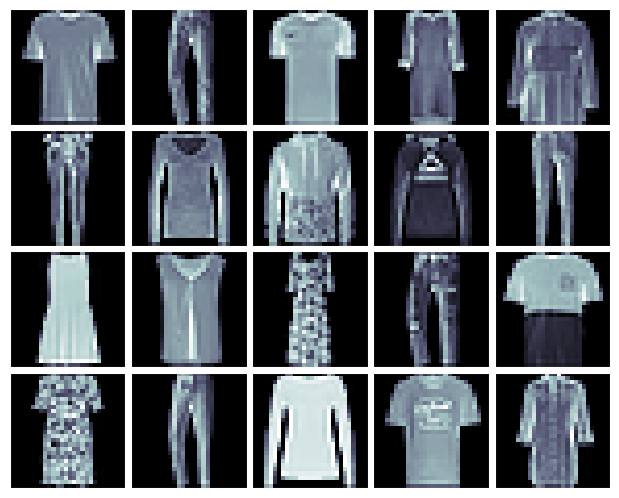

In [17]:
# plotting Images from our original dataset to compare with PCA reconstruction later
# Below code was somewhat inspired by # https://shankarmsy.github.io/posts/pca-sklearn.html

X_train_img = X_train.reshape(10000,28,28)

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train_img[i], cmap=plt.cm.bone, interpolation='nearest')

In [26]:
# Reducing the dimension of our images with PCA to lower the number of features
pca_61 = PCA(n_components=61)
X_pca = pca_61.fit_transform(X_train)

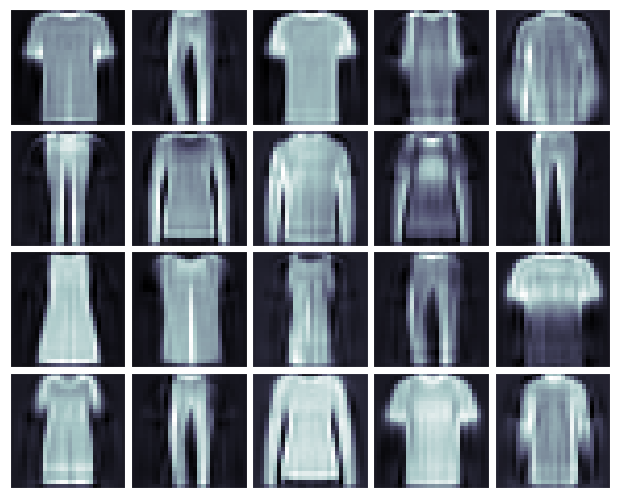

In [19]:
# Applying PCA and reconstructing the images

X_inv_proj = pca_61.inverse_transform(X_pca)  # reconstruct original images (10% information was lost) due to PCA
X_proj_img = X_inv_proj.reshape(10000,28,28)

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')


Some detail was lost after reconstruction however shape is intact.
It seems like using PCA could be useful as it will significantly improve performance of training
allowing for more complex models.

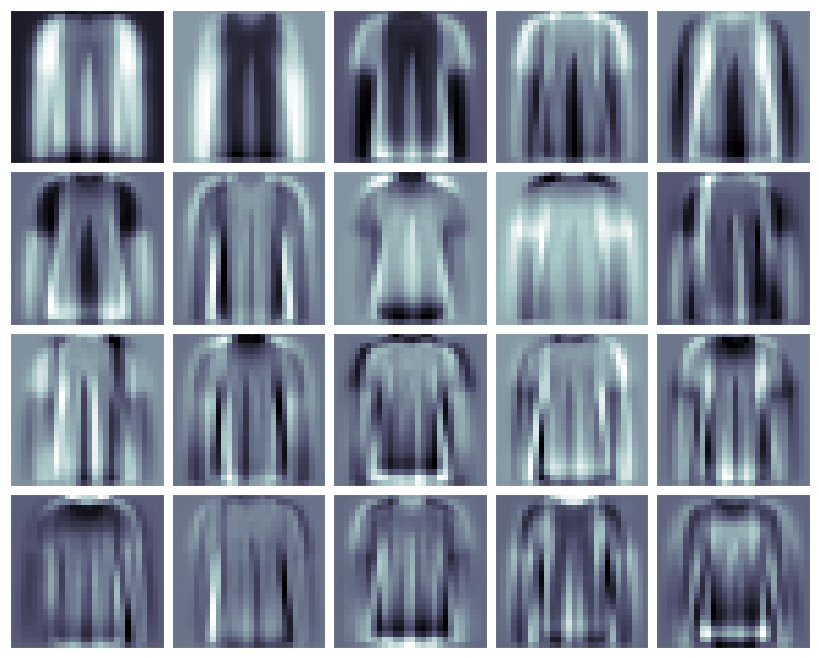

In [20]:
# Below we'll try to visualize the top 20 principal components.
# This is NOT a reconstruction of the original data,
# just visualizing the principal components as images.

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(pca_61.components_[i,:].reshape(28,28), cmap=plt.cm.bone)

In [21]:
# let's now try to reconstruct the images using the new reduced dataset.